In [1]:
import pandas as pd
import os
import string
# nltk for optional text processing (stemming/lemmatization)
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

In [4]:
# Load the dataset
df = pd.read_csv('songs_with_lyrics1.csv')

In [5]:
# Ensure necessary nltk resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Handling Missing Values: Remove rows with NaN in any column
df.dropna(inplace=True)

# Additional Criteria: Ignore songs with no lyrics
df = df[df['lyrics'].str.strip().astype(bool)]

# Data Normalization
# Convert to lowercase
df['lyrics'] = df['lyrics'].apply(lambda x: x.lower())
# Remove punctuation
df['lyrics'] = df['lyrics'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Optional: Apply stemming/lemmatization
# Initialize stemmer
stemmer = PorterStemmer()

# Function to stem tokens
def stem_sentence(sentence):
    tokens = word_tokenize(sentence)
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stopwords.words('english')]
    return ' '.join(stemmed_tokens)


[nltk_data] Downloading package punkt to /Users/ruiqiliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ruiqiliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Saving each song to a separate CSV file
for index, row in df.iterrows():
    # Define a filename using the song's ID
    filename = f"song_{row['id']}.csv"
    # Save the single row to a CSV file
    row.to_frame().T.to_csv(os.path.join('final/', filename), index=False)

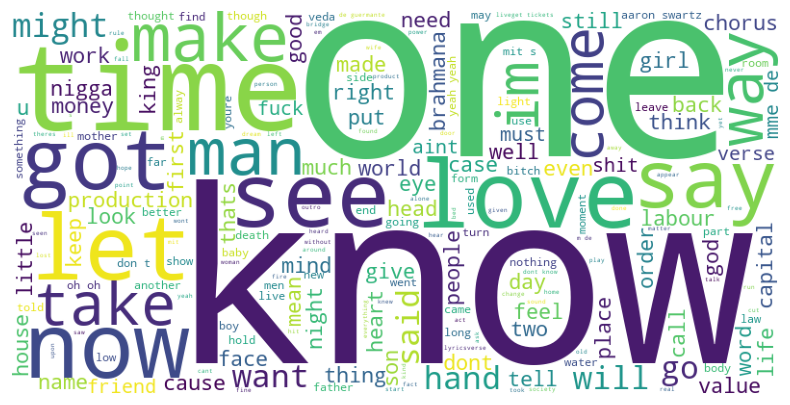

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# Assuming 'df' is your DataFrame after preprocessing
# Word count in lyrics
df['word_count'] = df['lyrics'].apply(lambda x: len(x.split()))


# Most common words in lyrics (word cloud)
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(df['lyrics']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

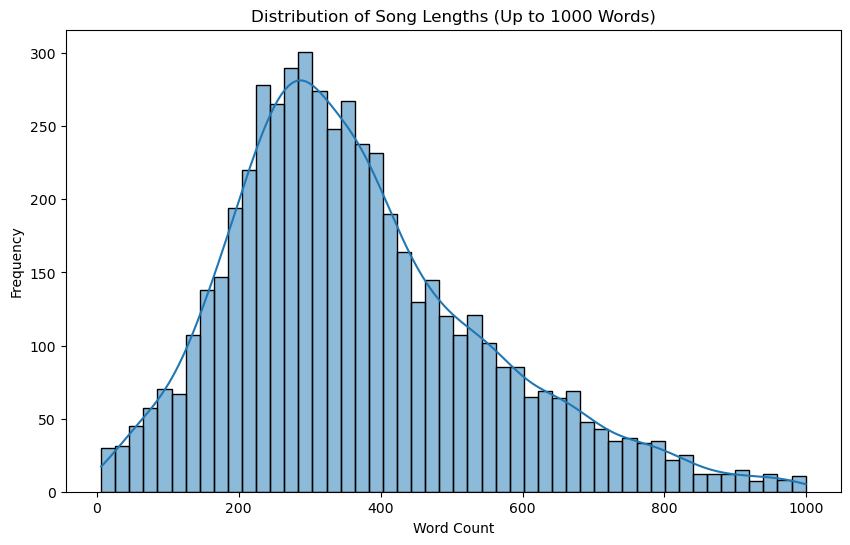

In [16]:
filtered_df = df[df['word_count'] <= 1000]

# Plot distribution of song lengths for filtered DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['word_count'], bins=50, kde=True)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Song Lengths (Up to 1000 Words)')
plt.show()

In [13]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to each song's lyrics
df['sentiment'] = df['lyrics'].apply(calculate_sentiment)

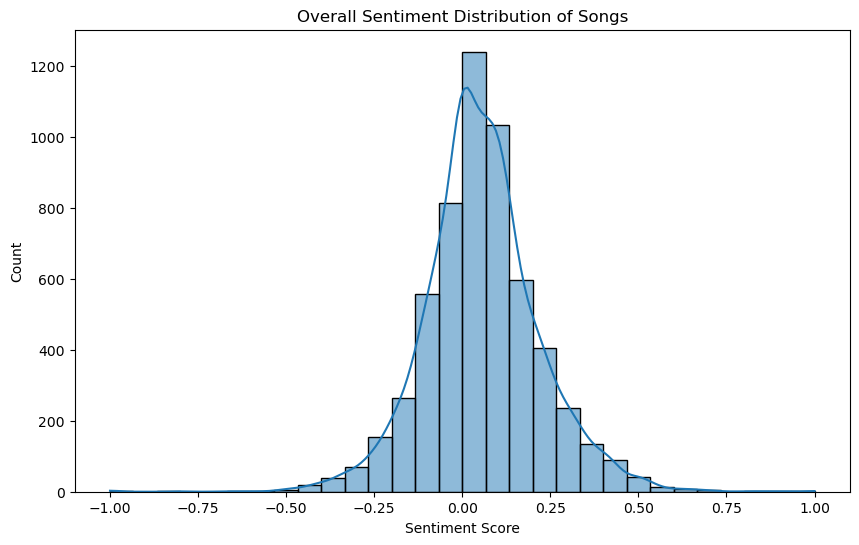

/var/folders/zm/j8shzc610xjcv_w44n5n6br80000gn/T/ipykernel_13126/1018713624.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


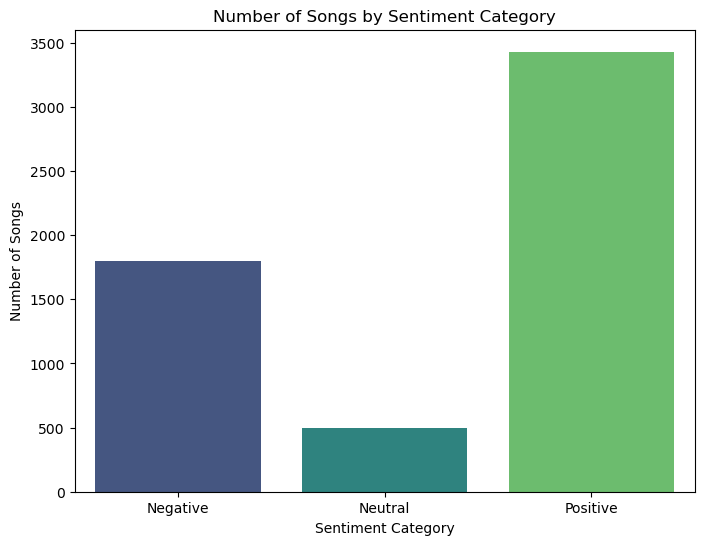

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Overall sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Overall Sentiment Distribution of Songs')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

# To categorize sentiments as positive, negative, or neutral
df['sentiment_category'] = pd.cut(df['sentiment'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])

# Count the number of songs in each category
sentiment_counts = df['sentiment_category'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Number of Songs by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Songs')
plt.show()

In [17]:
# Sample exploration of song that might categorized as romance 
# Keywords associated with romance songs
romance_keywords = ['love', 'heart', 'dear', 'darling', 'sweetheart', 'romance']

# Function to categorize songs based on keywords
def is_romance_song(lyrics):
    return any(keyword in lyrics for keyword in romance_keywords)

# Apply the categorization
df['is_romance'] = df['lyrics'].apply(is_romance_song)

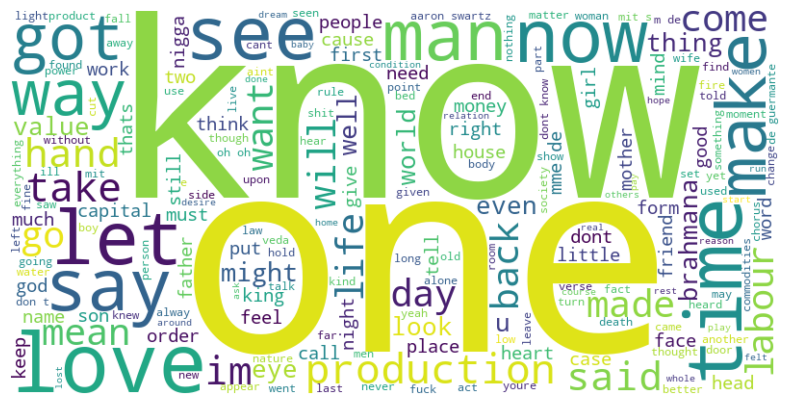

In [18]:
from wordcloud import WordCloud

# Filter to romance songs
romance_songs = df[df['is_romance']]

# Generate a word cloud for romance songs
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(romance_songs['lyrics']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

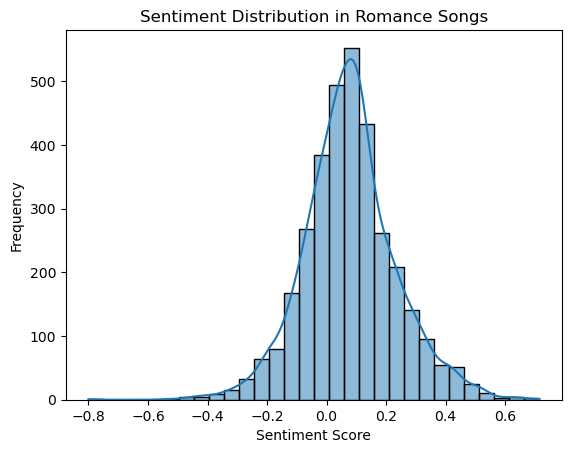

In [19]:
# Assuming you've already calculated sentiment scores
sns.histplot(romance_songs['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution in Romance Songs')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

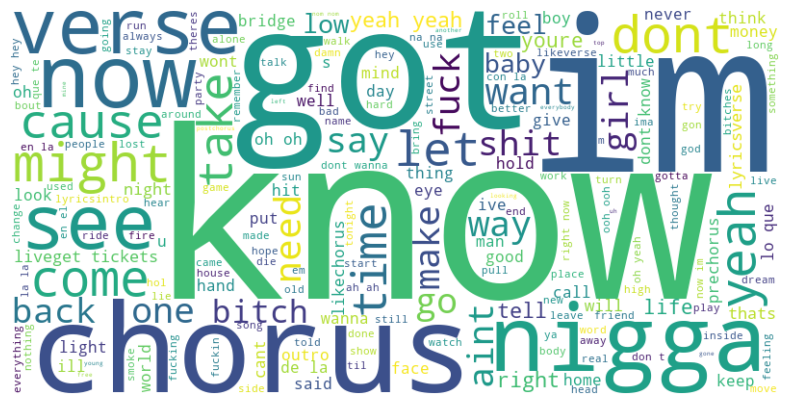

In [21]:
non_romance_songs = df[~df['is_romance']]
# Generate a word cloud for non-romance songs
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(non_romance_songs['lyrics']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

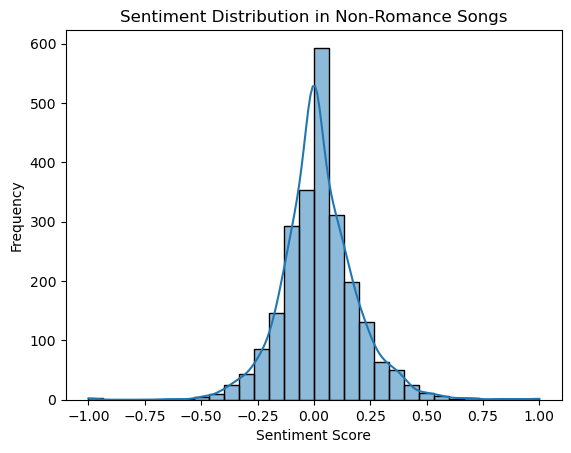

In [22]:
# Plot sentiment distribution for non-romance songs
sns.histplot(non_romance_songs['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution in Non-Romance Songs')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()